# PYTHON PROGRAMMING 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.style.use('dark_background')
%matplotlib inline

# 기온데이터 분석

### 1907년부터 2018년3월까지의 서울 기온 데이터를 CSV로 다운로드 한다.

### - 다운로드 파일을 미리 제공해서 폴더에 넣어두었습니다. seoul.csv 파일을 열어 보세요. encoding='cp949'

In [4]:
pd.read_csv('../big_csv_files/seoul.csv')
# 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte  인코딩 에러가 남

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte

In [74]:
# read_csv()
# 인코딩 방식 지정하기 
sel_weather = pd.read_csv('../big_csv_files/seoul.csv', encoding='cp949')

In [ ]:
#google_stock = pd.read_csv('GOOG.csv', usecols=['Date', 'Adj Close'], parse_dates=True, index_col = ['Date'] )

In [141]:
sel_weather22 = pd.read_csv('../big_csv_files/seoul.csv', encoding='cp949', parse_dates=True, index_col = ['날짜'])

In [144]:
sel_weather22.index

DatetimeIndex(['1907-10-01', '1907-10-02', '1907-10-03', '1907-10-04',
               '1907-10-05', '1907-10-06', '1907-10-07', '1907-10-08',
               '1907-10-09', '1907-10-10',
               ...
               '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22',
               '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28'],
              dtype='datetime64[ns]', name='날짜', length=39926, freq=None)

In [75]:
sel_weather

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


## 실습 1. 가장 더운날은 언제입니까?

In [15]:
max_day = sel_weather['최고기온(℃)'] == sel_weather['최고기온(℃)'].max()

In [23]:
sel_weather.loc[ max_day, ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


In [ ]:
sel_weather.loc[ max_day, '날짜']

In [80]:
sel_weather.loc[ max_day, ].values

array([[Timestamp('1994-07-24 00:00:00'), 108, 33.1, 28.1, 38.4]],
      dtype=object)

In [81]:
sel_weather.loc[ max_day, ].values[0]

array([Timestamp('1994-07-24 00:00:00'), 108, 33.1, 28.1, 38.4],
      dtype=object)

## 실습 2. 최고기온을 히스토그램으로 나타내되, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [24]:
sel_weather['최고기온(℃)'].max()

38.4

In [69]:
sel_weather['최고기온(℃)'].describe()

# -16.3, 38.4
degree4 = np.arange(-16.3, 38.4+4.0, 4.0)

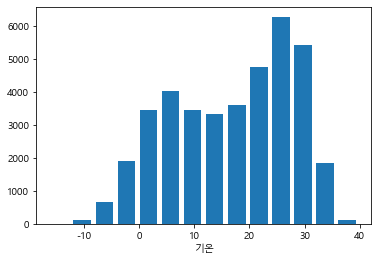

In [70]:
plt.hist(data=sel_weather, x ='최고기온(℃)', rwidth=0.8, bins = degree4)
plt.xlabel('기온')
plt.show()

In [85]:
sel_weather.shape

(39926, 5)

## 실습 3. 위에서는 모든 날짜에 대한 데이터 입니다.  그러면! 2014년도 부터의 데이터를 기준으로, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [36]:
sel_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39926 non-null  object 
 1   지점       39926 non-null  int64  
 2   평균기온(℃)  39170 non-null  float64
 3   최저기온(℃)  39169 non-null  float64
 4   최고기온(℃)  39168 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [100]:
sel_weather.loc[ sel_weather['날짜'] == '2014-01-01', ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9


In [103]:
start = sel_weather.loc[ sel_weather['날짜'] == '2014-01-01', ].index

In [107]:
sel_weather.loc[ start: , ]

AssertionError: Start slice bound is non-scalar

In [ ]:
# 날짜를 인덱스로 만들어서, 슬라이싱 사용

In [109]:
sel_weather2 = sel_weather.set_index('날짜')

In [113]:
sel_weather2 = sel_weather2.loc[ '2014-01-01' : ,]

(array([  0.,   5.,  14.,  58., 133., 184., 127., 123., 132., 156., 210.,
        304.,  93.,   8.]),
 array([-16.3, -12.3,  -8.3,  -4.3,  -0.3,   3.7,   7.7,  11.7,  15.7,
         19.7,  23.7,  27.7,  31.7,  35.7,  39.7]),
 <BarContainer object of 14 artists>)

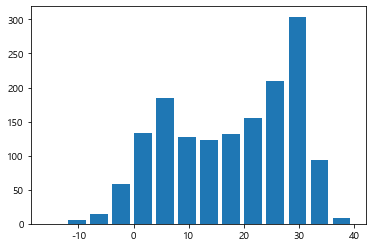

In [114]:
plt.hist(data=sel_weather2, x ='최고기온(℃)', rwidth=0.8, bins = degree4)

In [ ]:
# 날짜 컬럼이 문자열입니다. 날짜 컬럼을 파이썬이 처리할 수 있는 날짜 형식으로 바꿔서 처리

In [115]:
sel_weather['날짜'].apply(pd.to_datetime)

0       1907-10-01
1       1907-10-02
2       1907-10-03
3       1907-10-04
4       1907-10-05
           ...    
39921   2018-03-24
39922   2018-03-25
39923   2018-03-26
39924   2018-03-27
39925   2018-03-28
Name: 날짜, Length: 39926, dtype: datetime64[ns]

In [116]:
sel_weather['날짜'] = sel_weather['날짜'].apply(pd.to_datetime)

In [117]:
sel_weather

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [120]:
#날짜 형식으로 변환
# to_datetime()
pd.to_datetime(sel_weather['날짜'])

0       1907-10-01
1       1907-10-02
2       1907-10-03
3       1907-10-04
4       1907-10-05
           ...    
39921   2018-03-24
39922   2018-03-25
39923   2018-03-26
39924   2018-03-27
39925   2018-03-28
Name: 날짜, Length: 39926, dtype: datetime64[ns]

In [122]:
# datetime 형식일 때, dt속성으로 액세스 할 수 있음
# 여러가지 속성 접근 가능, dt.year /dt.month / dt.day /dt.weekdday
sel_weather['날짜'].dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
39921    2018
39922    2018
39923    2018
39924    2018
39925    2018
Name: 날짜, Length: 39926, dtype: int64

In [121]:
sel_weather['날짜'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
39921     3
39922     3
39923     3
39924     3
39925     3
Name: 날짜, Length: 39926, dtype: int64

In [123]:
sel_weather['날짜'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
39921    24
39922    25
39923    26
39924    27
39925    28
Name: 날짜, Length: 39926, dtype: int64

In [124]:
sel_weather['날짜'].dt.year >= 2014

0        False
1        False
2        False
3        False
4        False
         ...  
39921     True
39922     True
39923     True
39924     True
39925     True
Name: 날짜, Length: 39926, dtype: bool

In [126]:
sel_weather_2014 = sel_weather.loc[ sel_weather['날짜'].dt.year >= 2014, ]

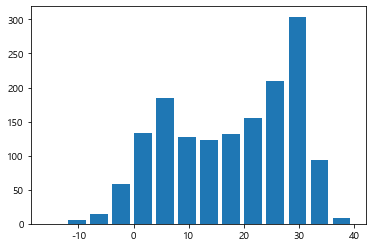

In [127]:
plt.hist(data=sel_weather_2014, x ='최고기온(℃)', rwidth=0.8, bins = degree4)
plt.show()

## 실습 4.  2017-08-01 ~ 2017-08-15 사이의 날짜별 x축,  최고기온을 y축으로 스케터로 나타내세요.

In [130]:
dateOct = (sel_weather['날짜'] >= '2017-08-01') & (sel_weather['날짜'] <= '2017-08-15')

In [132]:
dateOct_dt = sel_weather.loc[ dateOct, ]

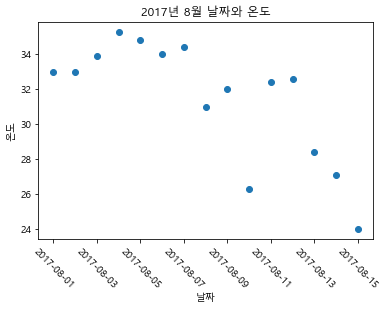

In [139]:
plt.scatter(data=dateOct_dt, x='날짜', y='최고기온(℃)')
plt.xticks(rotation = -45)
plt.xlabel('날짜')
plt.ylabel('온도')
plt.title('2017년 8월 날짜와 온도')
plt.show()
